In [10]:
import pandas as pd
Online_Retail = pd.read_csv('Online_Retail.csv',encoding='ISO-8859-1')
Online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,3.39,17850.0,United Kingdom


In [11]:
# Discribe for summery of the data
Online_Retail.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# Clean the columns name 
def clean_col(col):
    col=col.strip()
    col=col.lower()
    return col.strip('_')

Online_Retail.columns=[clean_col(col) for col in Online_Retail.columns]
Online_Retail.head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010,1.69,13047.0,United Kingdom


In [13]:
# See the total number of columns and rows
Online_Retail.shape[1]
Online_Retail.shape[0]

541909

In [14]:
# Remove nagtive quantity
Online_Retail.dropna(subset=['customerid'],inplace=True )
Online_Retail=Online_Retail[Online_Retail['quantity'] > 0]

In [15]:
Online_Retail.shape[0]

397924

In [16]:
# Create a copy for 
Online_Retail_copy = Online_Retail.copy()


In [17]:
# convert Invoicedate  into datetime
Online_Retail['invoicedate'] = pd.to_datetime(Online_Retail['invoicedate'],dayfirst=True)

In [18]:
# Create a total amount columns[Total_amount = quantity * unitprice]
Online_Retail['total_amount']=Online_Retail['quantity'] * Online_Retail['unitprice']

In [19]:
Online_Retail.head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047.0,United Kingdom,54.08


In [20]:
# Claculate RMF matrix
# Choose a reference date to calculate Recency, like the last invoice date + 1 day.
import datetime as dt

snapshot_date = Online_Retail['invoicedate'].max() + dt.timedelta(days=1)

rfm = Online_Retail.groupby('customerid').agg({
    'invoicedate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'invoiceno': 'nunique',                                   # Frequency
    'total_amount': 'sum'                                      # Monetary
})

rfm.rename(columns={
    'invoicedate': 'Recency',
    'invoiceno': 'Frequency',
    'total_amount': 'Monetary'
}, inplace=True)



In [21]:
# Assigning R, F, M scores using quintiles (divides data into 5 parts)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])                        # lower recency is better!
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])                       # Frequency and Monetary: higher is better


In [22]:
print(rfm.columns)


Index(['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score'], dtype='object')


In [23]:
# Convert score columns to 'int' before summing
rfm[['R_Score', 'F_Score', 'M_Score']] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int)


In [24]:
# Now create RFM_Score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']


In [25]:
rfm.sort_values('RFM_Score', ascending=False).head(10)


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
customerid,,,,,,,
18283.0,4,16,2094.88,5,5,5,15
15033.0,5,10,2586.67,5,5,5,15
18245.0,8,7,2567.06,5,5,5,15
17091.0,3,9,3827.76,5,5,5,15
13269.0,2,15,5346.23,5,5,5,15
13267.0,3,19,4521.49,5,5,5,15
13266.0,12,12,3834.26,5,5,5,15
13263.0,2,35,7454.07,5,5,5,15
17188.0,12,7,2474.23,5,5,5,15


In [26]:
# Count of each RFM segment
rfm['RFM_Score'].value_counts().head(10)


RFM_Score
6     422
7     385
8     375
4     365
15    348
11    346
10    344
5     339
9     333
12    317
Name: count, dtype: int64

In [33]:
def rfm_level(Online_Retail):
    if Online_Retail['RFM_Score'] >= 12:
        return 'Champions'
    elif Online_Retail['RFM_Score'] >= 9:
        return 'Loyal Customers'
    elif Online_Retail['RFM_Score'] >= 6:
        return 'Potential Customers'
    else:
        return 'At Risk'

# Apply it to the RFM table
rfm['Customer_Level'] = rfm.apply(rfm_level, axis=1)


In [2]:
import sys
print(sys.executable)


C:\Users\JYOTIRMAY DAS\Analysis_P\Scripts\python.exe


In [36]:
print(rfm['Customer_Level'].value_counts())


Customer_Level
Champions              1249
Potential Customers    1182
Loyal Customers        1023
At Risk                 885
Name: count, dtype: int64


C:\Users\JYOTIRMAY DAS\AppData\Local\Temp\ipykernel_10080\3307425371.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Customer_Level',order=rfm['Customer_Level'].value_counts().index, palette='coolwarm')


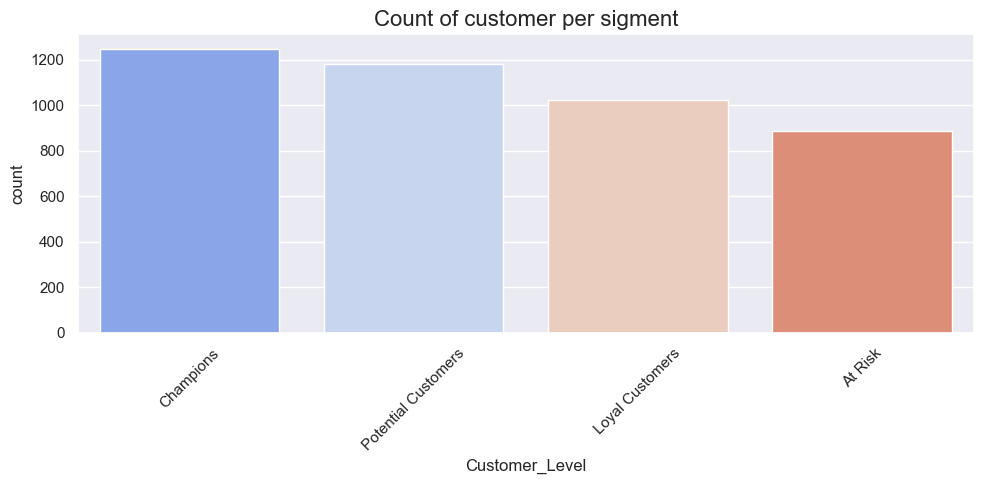

In [35]:
# Customer Segment bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=rfm, x='Customer_Level',order=rfm['Customer_Level'].value_counts().index, palette='coolwarm')
plt.title('Count of customer per sigment',fontsize=16)
# plt.xlable('Customer segment')
# plt.ylable('Number of Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

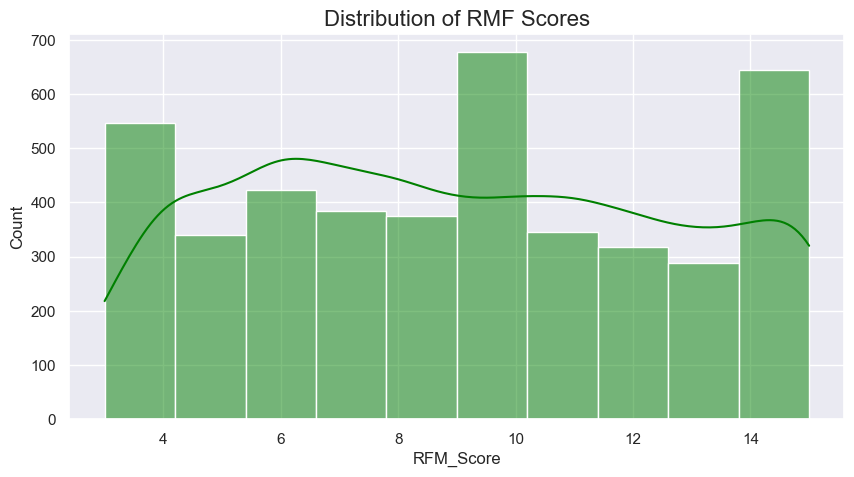

In [39]:
# RFM Score distribution
plt.figure(figsize=(10,5))
sns.histplot(data=rfm,x='RFM_Score',bins=10,kde=True,color='green')
plt.title('Distribution of RMF Scores',fontsize=16)
plt.show()

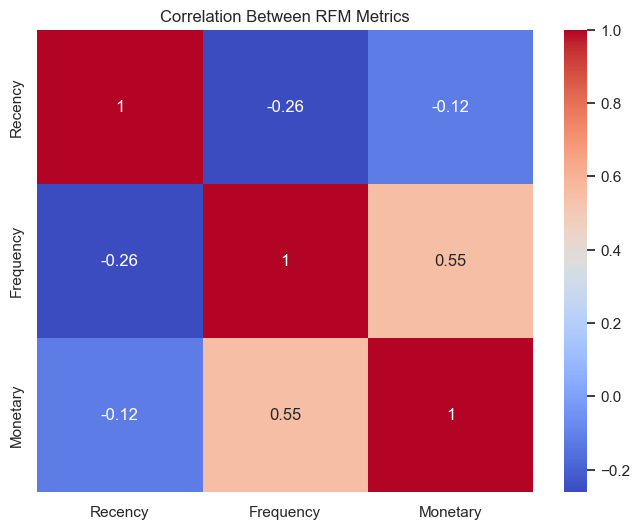

In [41]:
# Correlation Between RFM Metrics
plt.figure(figsize=(8,6))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between RFM Metrics')
plt.show()


C:\Users\JYOTIRMAY DAS\Analysis_P\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


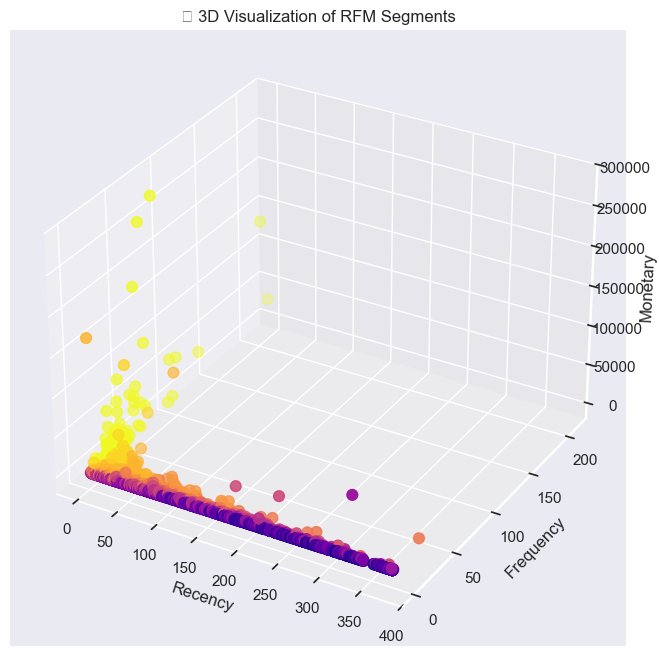

In [42]:
# 3D RFM Cluster View 
# from mpl_toolkits.mplot3d import Axes3D is a special toolkit inside Matplotlib that allows you to plot 3D graphs (not just flat 2D stuff)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['RFM_Score'], cmap='plasma', s=60)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('🔮 3D Visualization of RFM Segments')
plt.show()


C:\Users\JYOTIRMAY DAS\Analysis_P\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


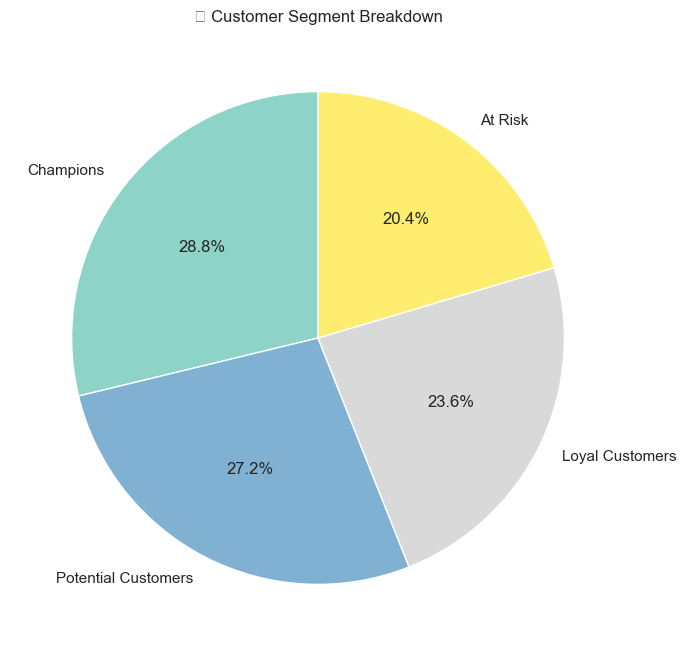

In [43]:
# Pie Chart of Customer Levels
rfm['Customer_Level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', figsize=(8,8))
plt.title('🥧 Customer Segment Breakdown')
plt.ylabel('')
plt.show()


In [44]:
rfm.reset_index(inplace=True)  # Bring back 'CustomerID' as column
rfm.to_csv("RFM_Final.csv", index=False)
